# " EcoCrop ML: Sustainable Crop Yield Prediction through Machine Learning Innovations"
# "FarmPredict: Machine Learning Approaches to Crop Yield Estimation"

Accurately predicting crop yields is a vital task in agriculture, essential for effective planning and decision-making. This project addresses this challenge by applying machine learning regression techniques to forecast the yields of various crops, including:

- Cassava
- Maize
- Plantains and related varieties
- Potatoes
- Rice (paddy)
- Sorghum
- Soybeans
- Sweet potatoes
- Wheat
- Yams



Utilizing publicly accessible datasets from the Food and Agriculture Organization (FAO) and the World Bank, the project integrates diverse data sources such as crop yield statistics, annual rainfall, pesticide usage, and temperature records. By employing machine learning algorithms, the goal is to enhance the accuracy of crop yield predictions, thereby supporting farmers and policymakers in making informed decisions.



### References

http://www.fao.org/home/en/

https://data.worldbank.org/


# Part One: Gathering & Cleaning Data 
# or Collecting data &  exploring and preparing the data



In [353]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [280]:
df_yield = pd.read_csv('yield.csv')


In [281]:
df_yield.shape

(56717, 12)

In [282]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [283]:
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [284]:
# rename columns value to hg/ha_yield
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [285]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [286]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


year starts at 1961 and ends at 2016

In [288]:
# Find the minimum and maximum year
min_year = df_yield["Year"].min()
max_year = df_yield["Year"].max()

print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")

Minimum Year: 1961
Maximum Year: 2016


In [289]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


# Rainfall

In [291]:
df_rain = pd.read_csv('rainfall.csv')


In [292]:
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [293]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [294]:
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [295]:
# check data types 
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [296]:
# convert average_rain_fall_mm_per_year from object to float

df_rain['average_rain_fall_mm_per_year'] = df_rain['average_rain_fall_mm_per_year'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [297]:
df_rain.shape

(6727, 3)

In [298]:
df_rain = df_rain.dropna()

In [299]:
df_rain.shape

(5947, 3)

In [300]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [301]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


Climate Data : Rainfall

In [303]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [304]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [305]:

# check data types 
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [306]:
# convert average_rain_fall_mm_per_year from object to float

df_rain['average_rain_fall_mm_per_year'] = df_rain['average_rain_fall_mm_per_year'].apply(pd.to_numeric, downcast='float', errors='coerce')


In [307]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [308]:
df_rain = df_rain.dropna()

In [309]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [310]:
# Find the minimum and maximum year
min_year = df_rain["Year"].min()
max_year = df_rain["Year"].max()

print(f"Minimum Year or rainfall : {min_year}")
print(f"Maximum Year of rainfall : {max_year}")

Minimum Year or rainfall : 1985
Maximum Year of rainfall : 2017


In [311]:
yield_df.shape

(28242, 8)

In [312]:
# Find the minimum and maximum year
min_year = df_yield["Year"].min()
max_year = df_yield["Year"].max()

print(f"Minimum Year of yeild: {min_year}")
print(f"Maximum Year of yeild : {max_year}")

Minimum Year of yeild: 1961
Maximum Year of yeild : 2016


In [313]:
# merge yield dataframe with rain dataframe by year and area columns 
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [314]:
yield_df.shape

(25385, 5)

In [315]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Maize,1986,16875,327.0
2,Afghanistan,Maize,1987,17020,327.0
3,Afghanistan,Maize,1989,16963,327.0
4,Afghanistan,Maize,1990,17582,327.0


now the years starting  year was 1961, now it's 1985 because that's when the rainfall data begins. 

In [317]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


# Factor: Pesticides Data:

In [319]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [320]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [321]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [322]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [323]:
# merge Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])


In [324]:
yield_df.shape

(18949, 6)

In [325]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Maize,1991,29068,1485.0,121.0
2,Albania,Maize,1992,24876,1485.0,121.0
3,Albania,Maize,1993,24185,1485.0,121.0
4,Albania,Maize,1994,25848,1485.0,201.0


# Factor Average Temprature:

In [327]:
avg_temp=  pd.read_csv('temp.csv')

In [328]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [329]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [330]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [331]:
# Find the minimum and maximum year
min_year = avg_temp["Year"].min()
max_year = avg_temp["Year"].max()

print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")

Minimum Year: 1743
Maximum Year: 2013


In [332]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [333]:
yield_df.shape

(28242, 7)

In [334]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [335]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Now we get the final obtained dataframe

# Part Two: Data Exploration
# or Step 2 – exploring and preparing the data


In [338]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [339]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [343]:
print("There are:", yield_df['Area'].nunique(), "countries")


There are: 101 countries


In [ ]:
The dataframe has 101 Countries, ordering these by 20 the highest yield production: 

In [347]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Area
India                 327420324
Brazil                167550306
Mexico                130788528
Japan                 124470912
Australia             109111062
Pakistan               73897434
Indonesia              69193506
United Kingdom         55419990
Turkey                 52263950
Spain                  46773540
South Africa           41333132
Germany                38780463
Egypt                  36828848
Canada                 34706922
Argentina              32864032
Italy                  32280700
Colombia               26927138
Dominican Republic     25312166
Morocco                22173010
Ecuador                21315591
Name: hg/ha_yield, dtype: int64

In [350]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Cassava         Brazil             33671231
Potatoes        Pakistan           32969754
Sweet potatoes  Japan              32794236
Potatoes        Turkey             30530955
Yams            Japan              29165394
Sweet potatoes  Brazil             28266502
Potatoes        South Africa       27341980
                Germany            26672181
Yams            Brazil             23472053
Sweet potatoes  Pakistan           21687615
Name: hg/ha_yield, dtype: int64

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [373]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [375]:
corr_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette("navy")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

/var/folders/lb/y3qwsjqn4tx3h8n1x2sw3c900000gn/T/ipykernel_1249/2383784633.py:3: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros_like(corr_data, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

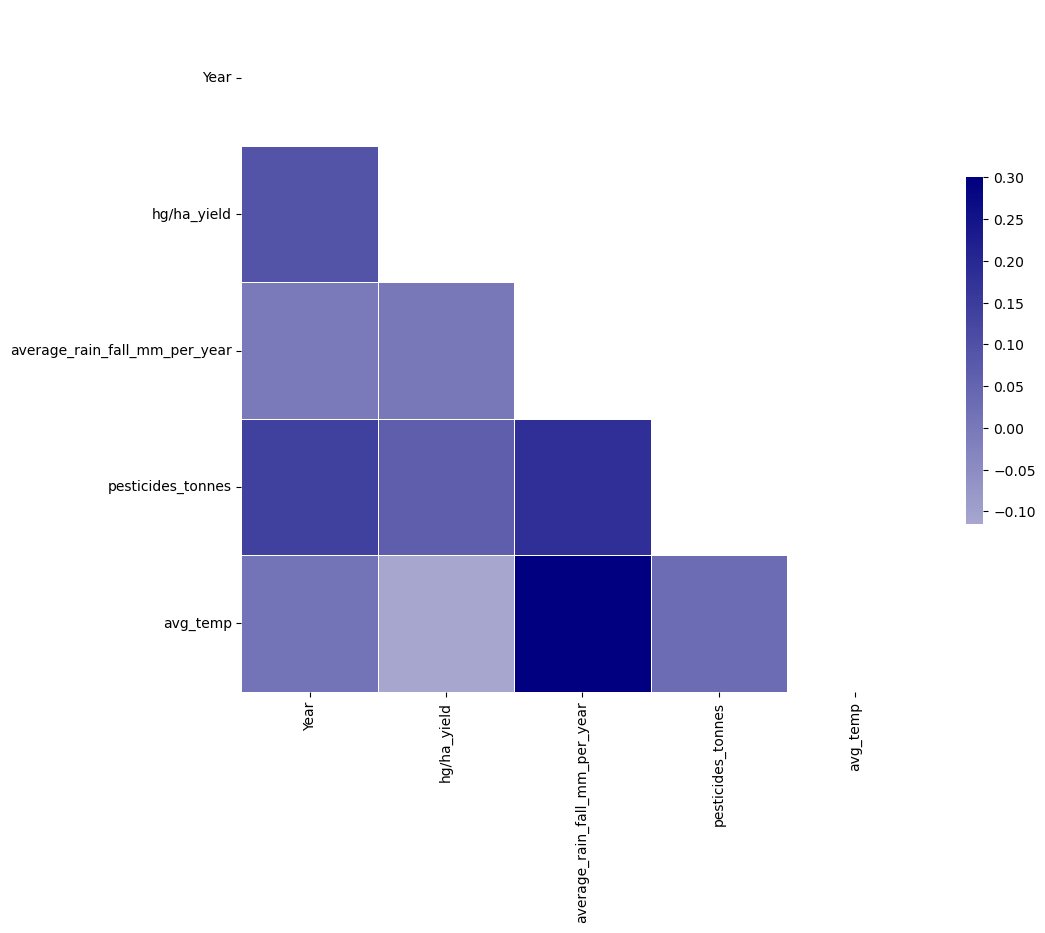

In [377]:

# Calculate the correlation matrix
corr_data = yield_df.select_dtypes(include=[np.number]).corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr_data, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette("navy", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


# Part Three: Data Preprocessing


In [383]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


### Encoding Categorical Variables:



In [388]:
from sklearn.preprocessing import OneHotEncoder

In [393]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1991,1485.0,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1992,1485.0,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1993,1485.0,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1994,1485.0,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [396]:
features = features.drop(['Year'], axis=1)

In [399]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 3.6 MB


In [402]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,15.36,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1485.0,121.0,16.06,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1485.0,121.0,16.05,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1485.0,201.0,16.96,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# Scaling Features:

In [407]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [ ]:
features

After dropping year column in addition to scaling all values in features, the resulting array will look something like this :

In [413]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 4.79045997e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.02896082e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 9.08240940e-03, 6.63713799e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 9.17806494e-03, 6.54855196e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

# Training Data

In [419]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [422]:
#write final df to csv file 
yield_df.to_csv('yield_df.csv')

In [425]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

# Part Four: Model Comparison & Selection


For this project, we'll compare between the following models :

Linear Regression (LR), 
K Nearest neighbor Regression (KNR),
Support Vector Regression (SVR), 
Decision Tree Regression (DTR),
Random Forest Regression (RFR), 
Gradient Boosting Regression (GBR),
Linear Model Lasso Regression, 
Elasticnet Regression,
Ridge Regression 

In [443]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor


In [448]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [450]:
models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(gamma='auto'),
   DecisionTreeRegressor()
]

In [452]:
model_train=list(map(compare_models,models)) 

In [459]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8957918626438968]
['RandomForestRegressor', 0.6907655921247855]
['SVR', -0.20174577592142273]
['DecisionTreeRegressor', 0.958815151592423]


# Algorithm Used

In [565]:
# Importing necessary regression models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Function to compare models
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_data, train_labels)  # Train the model
    y_pred = fit.predict(test_data)  # Predict the test data
    r2 = r2_score(test_labels, y_pred)  # Calculate the R² score
    return [model_name, r2]

# List of models to be evaluated
models = [
    LinearRegression(),
    KNeighborsRegressor(),
    SVR(gamma='auto'),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    Lasso(),
    ElasticNet(),
    Ridge()
]

# Compare models using map and store the results
model_train = list(map(compare_models, models))

# Print the results
print(*model_train, sep="\n")


['LinearRegression', 0.7456652247970051]
['KNeighborsRegressor', 0.9577262614646724]
['SVR', -0.20174577592142273]
['DecisionTreeRegressor', 0.9591920277687963]
['RandomForestRegressor', 0.6907655921247855]
['GradientBoostingRegressor', 0.8957918626438968]
['Lasso', 0.7454968193317235]
['ElasticNet', 0.23114333586867597]
['Ridge', 0.7454290258470726]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.708e+10, tolerance: 1.423e+10
  model = cd_fast.enet_coordinate_descent(


# R² (Coefficient of Determination) and Adjusted R²:
- R² = 1: Perfect fit.
- R² = 0: No variance explained.
# Adjusted R²:

Adjusts R² for the number of predictors in the model.
- Increases: If a new predictor significantly improves the model.
- Decreases: If the predictor adds little value.

# Purpose:

R² evaluates the fit of the model.
Adjusted R² ensures predictors improve the model beyond chance.

In [462]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [465]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,29068,1485.0,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,24876,1485.0,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,24185,1485.0,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,25848,1485.0,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [468]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [471]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.090370,0.535264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.458451,0.000135,0.631005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.183443,0.132330,0.552300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,0.179695,0.867802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.458451,0.000305,0.629983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [474]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.090370,0.535264
1,0.458451,0.000135,0.631005
2,0.183443,0.132330,0.552300
3,1.000000,0.179695,0.867802
4,0.458451,0.000305,0.629983


In [477]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.090370,0.535264,Spain,Sweet potatoes
1,0.458451,0.000135,0.631005,Madagascar,Potatoes
2,0.183443,0.132330,0.552300,Spain,Sweet potatoes
3,1.000000,0.179695,0.867802,Colombia,Soybeans
4,0.458451,0.000305,0.629983,Madagascar,"Rice, paddy"


In [480]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

/var/folders/lb/y3qwsjqn4tx3h8n1x2sw3c900000gn/T/ipykernel_1249/266024946.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))


Item
Cassava                 0.936414
Maize                   0.890608
Plantains and others    0.630531
Potatoes                0.905313
Rice, paddy             0.875025
Sorghum                 0.765396
Soybeans                0.858586
Sweet potatoes          0.887603
Wheat                   0.938351
Yams                    0.884751
dtype: float64

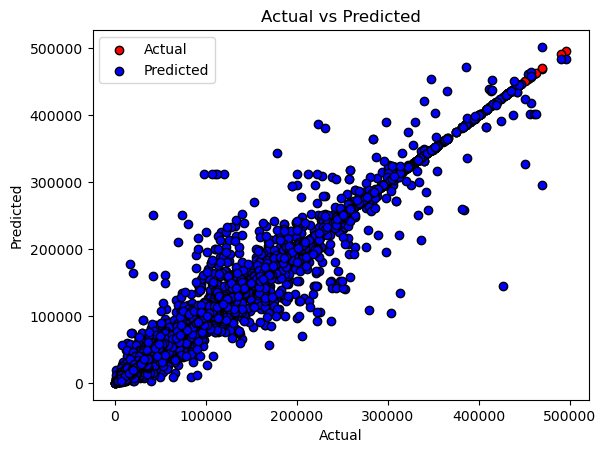

In [491]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots()

# Plot actual values in blue
ax.scatter(test_df["yield_actual"], test_df["yield_actual"], color='red', edgecolors=(0, 0, 0), label='Actual')

# Plot predicted values in orange
ax.scatter(test_df["yield_actual"], test_df["yield_predicted"], color='blue', edgecolors=(0, 0, 0), label='Predicted')

# Set labels and title
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")

# Add legend to differentiate actual and predicted points
ax.legend()

plt.show()


# Adjusted R²:


In [567]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

/var/folders/lb/y3qwsjqn4tx3h8n1x2sw3c900000gn/T/ipykernel_1249/878146640.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))


Item
Cassava                 0.935476
Maize                   0.889815
Plantains and others    0.607598
Potatoes                0.904641
Rice, paddy             0.873976
Sorghum                 0.763096
Soybeans                0.857176
Sweet potatoes          0.886383
Wheat                   0.937866
Yams                    0.880447
dtype: float64

# Part Five: Model Results & Conclusions

In [503]:
varimp= {'importances':model.feature_importances_,
         'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

/var/folders/lb/y3qwsjqn4tx3h8n1x2sw3c900000gn/T/ipykernel_1249/1727186157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);


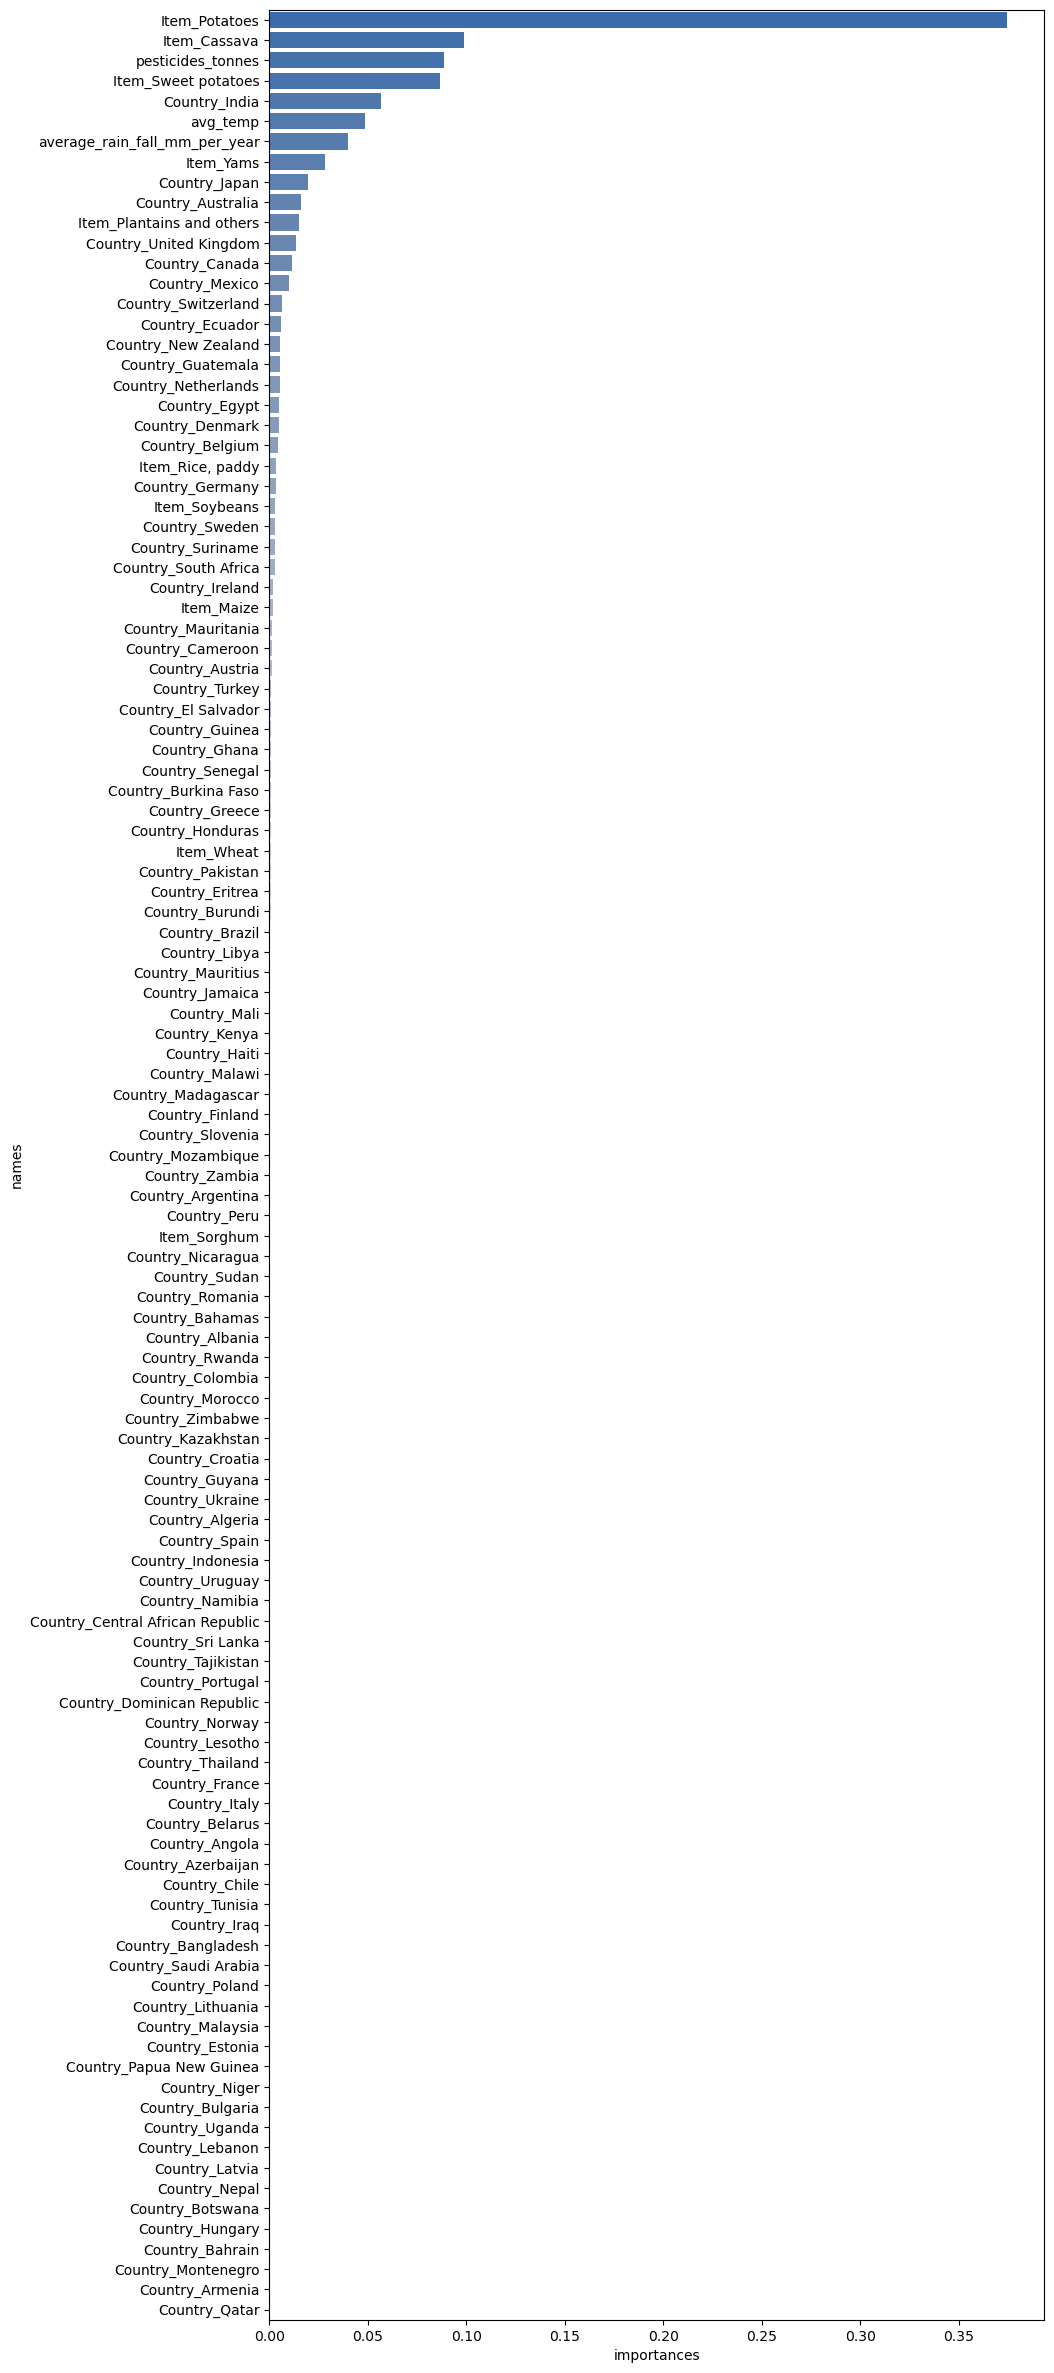

In [506]:
a4_dims = (10,30)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["importances"],inplace=True)
df=df.dropna()
sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);

# Getting only top 7 of features importance in the model

/var/folders/lb/y3qwsjqn4tx3h8n1x2sw3c900000gn/T/ipykernel_1249/3539252040.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);


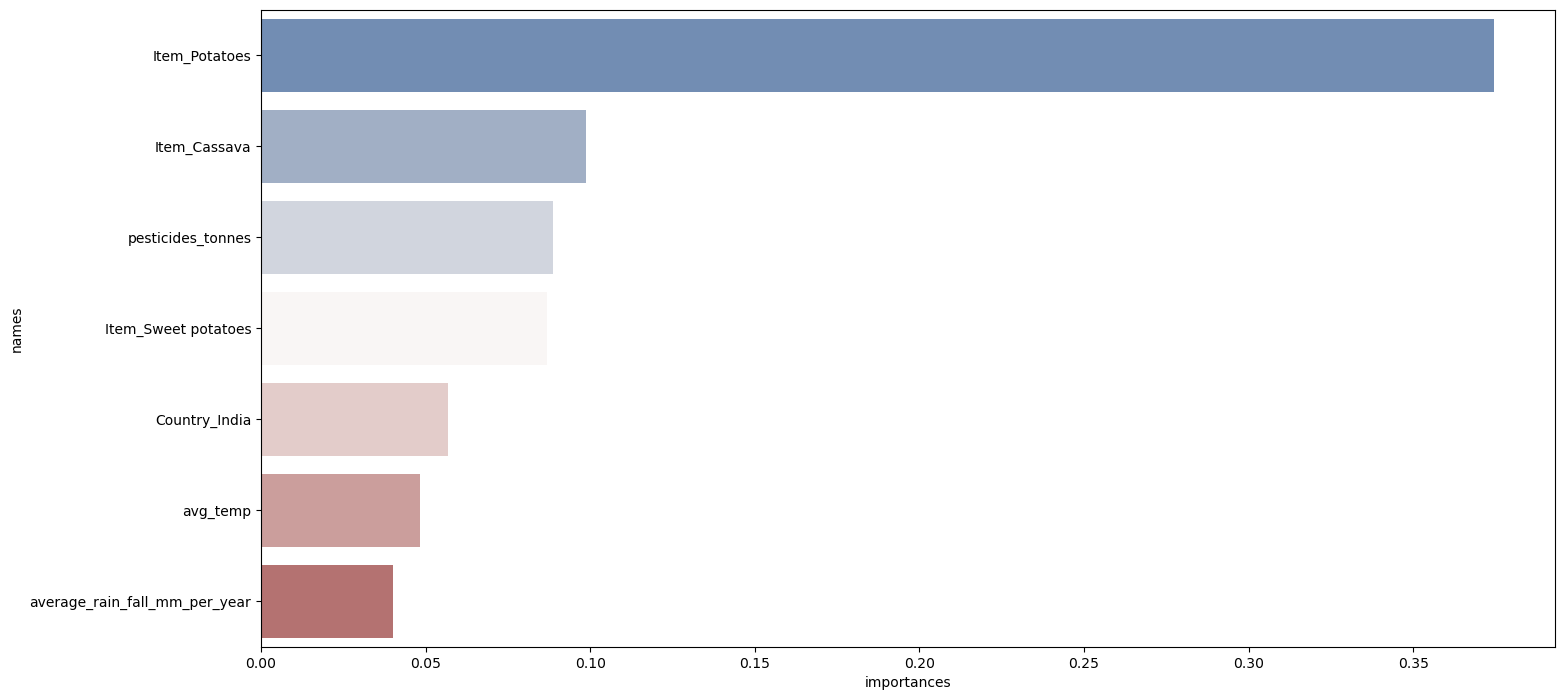

In [511]:
#7 most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["importances"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'importances')
sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);

/var/folders/lb/y3qwsjqn4tx3h8n1x2sw3c900000gn/T/ipykernel_1249/3852454215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);


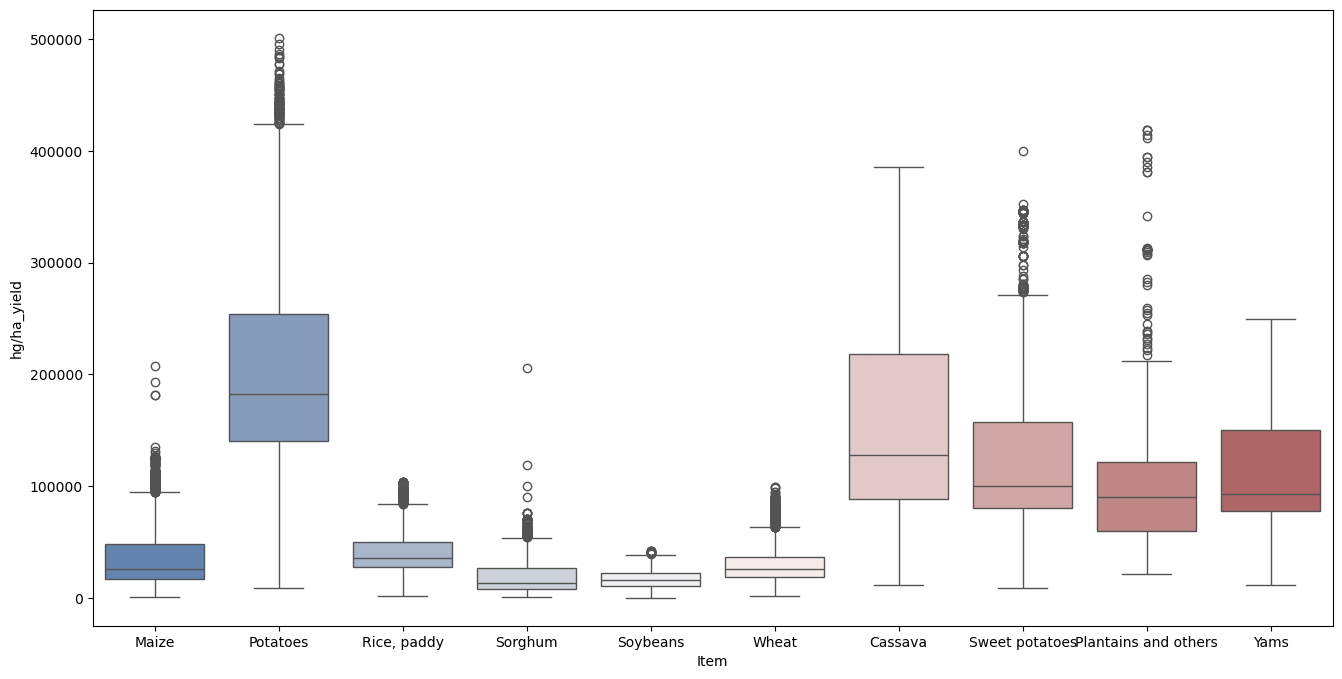

In [514]:
#Boxplot that shows yield for each item 
a4_dims = (16, 8.)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);

In [536]:
conda install graphviz

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.12.14         |  py312hecd8cb5_0         163 KB
    conda-24.11.2              |  py312hecd8cb5_0         1.2 MB
    fontconfig-2.14.1          |       h269ac6a_3         249 KB
    fonts-conda-ecosystem-1    |       hd3eb1b0_0           5 KB
    gdk-pixbuf-2.42.10         |       h46256e1_1         578 KB
    graphviz-2.50.0            |       h71bf62d_2         2.5 MB
    gts-0.7.6                  |       h6759243_3         276 KB
    harfbuzz-4.3.0             |       hffc734d_2         1.1 MB
    libgd-2.3.3                |       he7e2580_1         198 KB
    librsvg-2.54.4             |       hdaab7a1_4         5.8 M

In [520]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Sanjay/Downloads/graphviz-2.38/release/bin'

In [538]:
# conda install pydotplus

Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_3          23 KB
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/noarch::pydotplus-2.0.2-py_3 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [545]:
from io import StringIO  # Use StringIO from the io module instead of sklearn.externals.six
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Assuming `model` is your trained model and `yield_df_onehot.columns` contains the feature names
dot_data = export_graphviz(model, out_file=None, max_depth=5, 
                           feature_names=yield_df_onehot.columns[yield_df_onehot.columns != "hg/ha_yield"])

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show the graph
graph.write_pdf("model_depth2.pdf")


True

In [555]:
data_max=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].max()
data_min=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].min()

# Print the max and min values
print("Maximum Values:")
print(data_max)
print("\nMinimum Values:")
print(data_min)


#saving the model using pickle
import pickle
filename = 'yield_model.sav'
pickle.dump(model, open(filename, 'wb'))

pickle.dump(data_max, open('max.data', 'wb'))
pickle.dump(data_min, open('min.data', 'wb'))

Maximum Values:
average_rain_fall_mm_per_year      3240.0
pesticides_tonnes                367778.0
avg_temp                            30.65
Country_Albania                      True
Country_Algeria                      True
                                   ...   
Item_Sorghum                         True
Item_Soybeans                        True
Item_Sweet potatoes                  True
Item_Wheat                           True
Item_Yams                            True
Length: 114, dtype: object

Minimum Values:
average_rain_fall_mm_per_year     51.0
pesticides_tonnes                 0.04
avg_temp                           1.3
Country_Albania                  False
Country_Algeria                  False
                                 ...  
Item_Sorghum                     False
Item_Soybeans                    False
Item_Sweet potatoes              False
Item_Wheat                       False
Item_Yams                        False
Length: 114, dtype: object
